# QGelado - Aprendizado de máquina

## Integrantes:
Ademir Martins Alves, Aryel Anne Louise de Souza Gabriel, Diogo Lima de Carvalho

### Link do repositório do projeto:
https://github.com/QGelado

O objetivo da aplicação é aplicar os conceitos vistos em aula e realizar uma análise de preços dos projetos em estoque no sistema. A ideia principal é fazer uma **requisição ao banco de dados** do sistema para retornar todos os sorvetes em estoque na loja. Após a coleta dos dados via API, o script irá **buscar na internet** os preços dos produtos pesquisados. Em seguida, será **calculada uma média geral** dos preços. Por fim, será **gerado um arquivo .csv** e haverá uma analise mais aprofundada dos dados com as bibliotecas sklearn e matplotlib. 

Esses dados serão muito úteis para a loja física, pois proporcionarão automaticamente aos interessados informações sobre os preços dos concorrentes, facilitando a tomada de decisão na definição do preço dos produtos. 

### Importando bibliotecas 

*É preciso baixar todas as bibliotecas usadas*

In [135]:
import requests
import json

### Chamando API do projeto na rota de Sorvetes

In [136]:
response = requests.get("https://r7b6tzdg-3000.brs.devtunnels.ms/sorvete-padrao")
response

<Response [200]>

In [137]:
content_response = response.json()
content_response

[{'_id': '65dd11392aacadacb8c01525',
  'marca': 'Kibon',
  'quantidade': 200,
  'status': 'Em estoque',
  'nome': 'Eskibon Clássico',
  'preco': 6,
  'sabor': 'Baunilha coberto com casquinha de chocolate ao leite',
  'descricao': 'Um delicioso e geladinho sorvete de baunilha coberto com uma casquinha de chocolate 79ml',
  'imagem': '/sorvete-padrao/image/1716050350859.png'},
 {'_id': '65dd12d92aacadacb8c01527',
  'marca': 'Kibon',
  'quantidade': 200,
  'status': 'Em estoque',
  'nome': 'Frutare Uva',
  'preco': 6,
  'sabor': 'Uva',
  'descricao': 'Um delicioso e geladinho sorvete de uva 79ml',
  'imagem': '/sorvete-padrao/image/1716052531762.jpeg'},
 {'_id': '65f3538e32fe6725e24752e3',
  'marca': 'Kibon',
  'quantidade': 250,
  'status': 'Em estoque',
  'nome': 'Chocotop',
  'preco': 10,
  'sabor': 'Chocolate',
  'descricao': 'Sorvete muito delicioso de chocolate',
  'imagem': '/sorvete-padrao/image/1716050488310.jpg'}]

### Atribuindo a um array os nomes dos sorvetes usando list comprehension

In [138]:
nomes_sorvetes = [sorvete['nome'] for sorvete in content_response]
nomes_sorvetes

['Eskibon Clássico', 'Frutare Uva', 'Chocotop']

### Importando bibliotecas para extrair informações dos preços

In [139]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import requests


### Atribuindo caminhos base

In [140]:
WEBDRIVER_PATH = "C:\\Users\\diogo\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
BASE_SITE = "https://www.google.com/"
LISTA_DE_MEDIAS = []

### Calcula média dos valores

In [141]:
def retorna_media(lista_de_precos):
    soma = sum(lista_de_precos)
    media = soma / len(lista_de_precos)
    return media

### Extrai todos os preços

In [142]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

def extrair_dados(url_base):
    lista_de_valores = []
    r = requests.get(url_base, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    lista_produtos = soup.find_all("div", class_='sh-dgr__gr-auto sh-dgr__grid-result')
    
    # Restringe para não vir produtos errados
    for produto in lista_produtos[:4]:
        preco_atual =  produto.find("span", class_="a8Pemb OFFNJ").text
        lista_de_valores.append(float(str(preco_atual)[3: len(preco_atual)].replace(",", ".")))

    media_final = retorna_media(lista_de_valores)
    return media_final
    

### Navega para encontrar dados

In [143]:
def busca_dados(search_term):
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(BASE_SITE)

    text_box_found = driver.find_element(By.XPATH, '//*[@id="APjFqb"]')

    # Termo shopping para sempre aparecer a aba na segunda página
    text_box_found.send_keys(f'{search_term} shopping')
    text_box_found.send_keys(Keys.RETURN)
    driver.implicitly_wait(4)
    aba_shopping = driver.find_element(By.XPATH, '//*[@id="hdtb-sc"]/div/div[1]/div[1]/div/div[2]/a/div').click()
    
    URL_ATUAL = driver.current_url
    driver.quit()
    
    resultado = extrair_dados(URL_ATUAL)
    LISTA_DE_MEDIAS.append({"Nome Sorvete": search_term, "Média preço": resultado})
    

### Itera sobre os sorvetes e chama as funções anteriores

Nessa etapa em caso de erro, tente rodar novamente. Algo pode ter dado errado ao executar o navegador

In [144]:
for sorvete_para_pesquisa in nomes_sorvetes:
    busca_dados(sorvete_para_pesquisa)

print(LISTA_DE_MEDIAS)

[{'Nome Sorvete': 'Eskibon Clássico', 'Média preço': 16.195}, {'Nome Sorvete': 'Frutare Uva', 'Média preço': 6.8975}, {'Nome Sorvete': 'Chocotop', 'Média preço': 27.689999999999998}]


### Importando pandas para gerar .csv

In [145]:
import pandas as pd

In [146]:
df = pd.DataFrame(LISTA_DE_MEDIAS)

df.to_csv('media_sorvetes_preco.csv', index=False)

### Importando sklearn e matplotlib para analise dos dados

In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

       Nome Sorvete  Média preço  Cluster
0  Eskibon Clássico      16.1950        0
1       Frutare Uva       6.8975        0
2          Chocotop      27.6900        1


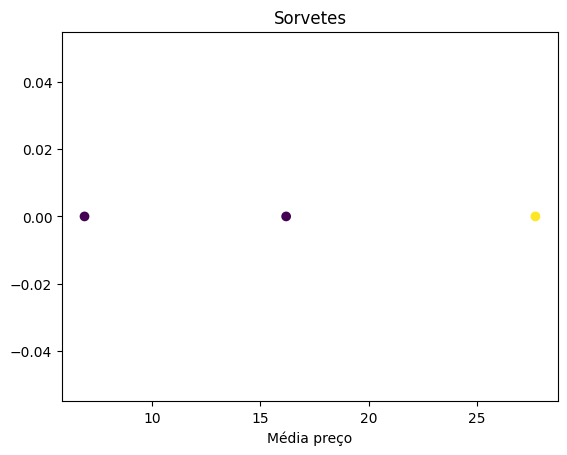

In [148]:
df_media_peco = df[['Média preço']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_media_peco)
df['Cluster'] = kmeans.labels_
print(df)

plt.scatter(df['Média preço'], [0]*len(df), c=df['Cluster'], cmap='viridis')
plt.xlabel('Média preço')
plt.title('Sorvetes')
plt.show()